## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combine_data=pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
combine_data.head()
#len(combine_data['Mouse ID'])



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.

len(combine_data)
combine_data.sort_values(['Mouse ID','Timepoint'],ascending=True).head()

combine_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_data=combine_data[combine_data.duplicated(['Mouse ID','Timepoint'])]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data['Mouse ID'].unique()
combine_data.loc[combine_data['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_data_clean=combine_data.loc[combine_data['Mouse ID'] != 'g989']
combine_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(combine_data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


groupByData = combine_data_clean.groupby(["Drug Regimen"])
groupByData
summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head()

,Mean,Median,Variance,Standard Variance,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

groupby_regimen=combine_data.groupby('Drug Regimen')
aggregate = groupby_regimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
#aggregate['mean'].map('{:.2f}'.format)
aggregate



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

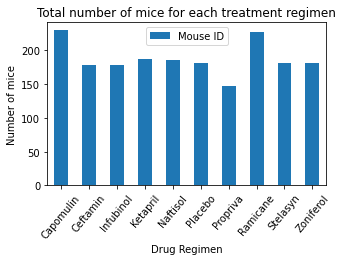

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Total_mice_eachregimen1=pd.DataFrame(combine_data_clean.groupby('Drug Regimen').count()['Mouse ID'])
#Total_mice_eachregimen.reset_index(inplace=True)
#Total_mice_eachregimen.style.hide_index(inplace=True)
Total_mice_eachregimen1.plot(kind="bar", figsize=(5,3),rot=50)
plt.title("Total number of mice for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.savefig("../Images/pandas_bar.png")
plt.show()
plt.tight_layout()


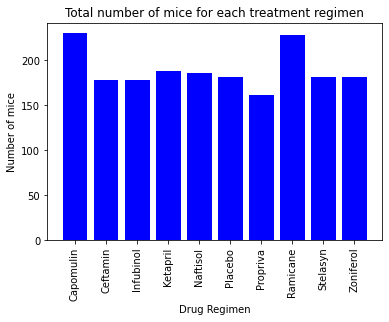

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

Total_mice_eachregimen=pd.DataFrame(combine_data.groupby('Drug Regimen').count()['Mouse ID'])
Total_mice_eachregimen.reset_index(inplace=True)
#x_axis=[]
#x_axis=Total_mice_eachregimen2['Drug Regimen
x_axis=np.arange(len(Total_mice_eachregimen['Drug Regimen']))
tickLocations = [value for value in x_axis]
y_axis=Total_mice_eachregimen2['Mouse ID']
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(tickLocations, Total_mice_eachregimen['Drug Regimen'], rotation="vertical")

plt.title("Total number of mice for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.savefig("../Images/pyplot_bar.png")
plt.show()
plt.tight_layout()


In [16]:
miceCount = combine_data_clean["Sex"].value_counts()
miceCount

Male      958
Female    922
Name: Sex, dtype: int64

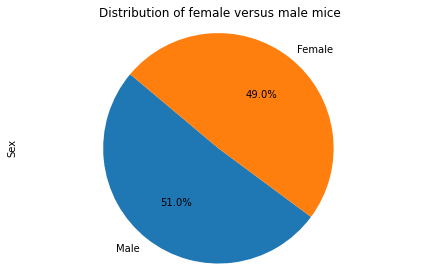

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

plt.figure()
miceCount.plot(kind="pie",rot=50, autopct='%1.1f%%', startangle=140)
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()
plt.savefig("../Images/pandas_pie.png")

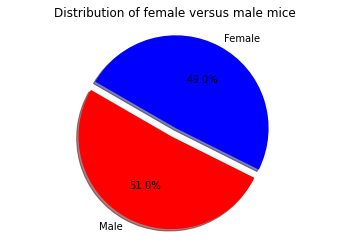

<Figure size 432x288 with 0 Axes>

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(miceCount.values, explode=(0.1,0), labels=miceCount.index.values, colors=["red","blue"],
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()
plt.savefig("../Images/pyplot_pie.png")

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_data = combine_data_clean[(combine_data_clean["Drug Regimen"] == "Capomulin") | 
                          (combine_data_clean["Drug Regimen"] == "Ramicane") | 
                          (combine_data_clean["Drug Regimen"] == "Infubinol") | 
                          (combine_data_clean["Drug Regimen"] == "Ceftamin")]


# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_df = regimen_data.groupby(regimen_data['Mouse ID']).agg({'Timepoint':['max']})
tumor_volume_df.columns = ['Timepoint']
tumor_volume_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = tumor_volume_df.reset_index()
tumor_vol_final_df = pd.merge(tumor_volume_df, combine_data_clean, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_final_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol_by_drug = tumor_vol_final_df['Tumor Volume (mm3)'].loc[tumor_vol_final_df['Drug Regimen'] == drug]   
    
    # add subset 
    
    tumor_volumes.append(tumor_vol_by_drug)    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')
    

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



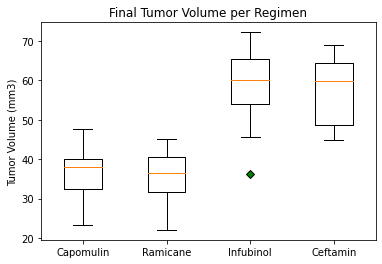

<Figure size 432x288 with 0 Axes>

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volumes, flierprops=dict(markerfacecolor='g', marker='D'))
plt.show()
plt.savefig("../Images/boxplot.png")

## Line and Scatter Plots

In [28]:
combine_data_clean.loc[combine_data_clean['Drug Regimen']=='Capomulin'].head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


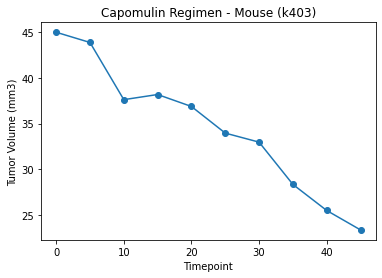

<Figure size 432x288 with 0 Axes>

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_mouse = combine_data_clean[['Timepoint', 'Tumor Volume (mm3)']].loc[(combine_data_clean['Drug Regimen'] == 'Capomulin') & (combine_data_clean['Mouse ID']=='s185')]
s185_mouse

plt.plot(s185_mouse['Timepoint'], s185_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen - Mouse (k403)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()
plt.savefig("../Images/lineplot.png")

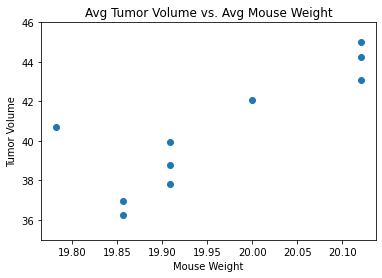

<Figure size 432x288 with 0 Axes>

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_avg_tumor_wgt = combine_data_clean.loc[combine_data_clean['Drug Regimen'] == 'Capomulin'].groupby(combine_data_clean['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
capomulin_avg_tumor_wgt.columns = ['Average Tumor Volume {mm3}', 'Average Mouse Weight (g)']
capomulin_avg_tumor_wgt.columns
weight=capomulin_avg_tumor_wgt['Average Mouse Weight (g)']
volume=capomulin_avg_tumor_wgt['Average Tumor Volume {mm3}']
plt.scatter(weight,volume)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)
plt.show()
plt.savefig("../Images/scatterplot.png")

## Correlation and Regression

The correlation between Average Tumor Volume and Mouse Weight is 0.82
The linear regression equation is y = 20.29x + -364.52


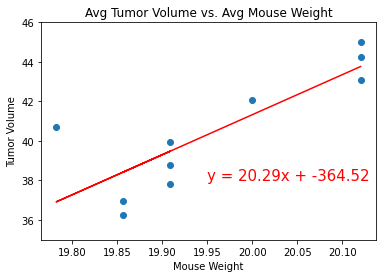

<Figure size 432x288 with 0 Axes>

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(volume,weight)
print(f'The correlation between Average Tumor Volume and Mouse Weight is {round(correlation[0],2)}')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,volume)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')

# plot line with scatter
volume = capomulin_avg_tumor_wgt['Average Tumor Volume {mm3}']
weight = capomulin_avg_tumor_wgt['Average Mouse Weight (g)']
plt.scatter(weight,volume)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

# calculate regression values
reg_values = weight * slope + intercept
plt.plot(weight, reg_values, "r-")
plt.annotate(line_eq,(19.95,38),fontsize=15,color="red")
plt.show()
plt.savefig("../Images/regression.png")